# Equation of State calculations

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

In [3]:
project = 't3'
pr = Project(project)

kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

Create structure and run Murnaghan simulation

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

In [5]:
ref_job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
ref_job.structure = structure
ref_job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
ref_job.calc_minimize()

In [6]:
murn_job = ref_job.create_job(pr.job_type.Murnaghan, 'murn_job')
murn_job.input["num_points"] = 3
murn_job.run()

The job murn_job was saved and received the ID: 1202
The job murn_job_0_9 was saved and received the ID: 1203
The job murn_job_1_0 was saved and received the ID: 1204
The job murn_job_1_1 was saved and received the ID: 1205


/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/atomistics/workflows/evcurve/fit.py:319: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(volume_lst, energy_lst, fit_order)


Add murn job to the knowledge graph

In [7]:
kg.add_workflow(murn_job, workflow_environment='pyiron')

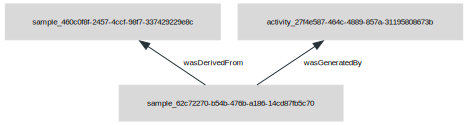

In [8]:
kg.visualise(size=(15,15), sample_view=True, layout='dot')

The above does not add the intermediate LAMMPS jobs, or the child jobs. This behaviour can be changed.

In [12]:
kg.add_workflow(murn_job, workflow_environment='pyiron', add_intermediate_jobs=True)

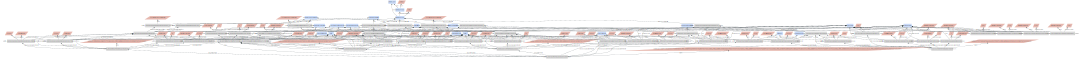

In [13]:
kg.visualise(size=(15,15), workflow_view=True, layout='dot')

Sample view can make the view easier

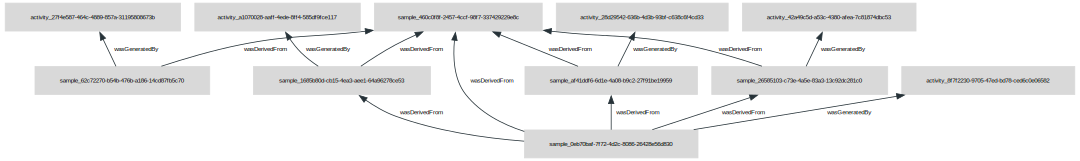

In [14]:
kg.visualise(size=(15,15), sample_view=True, layout='dot')